In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta

warnings.filterwarnings('ignore')

In [4]:
with open("../btc_usd_1d.pkl", "rb") as f:
    df = pickle.load(f)
df.reset_index(inplace=True)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df.set_index('Date', inplace=True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2014-11-29 to 2022-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2614 non-null   float64
 1   High    2614 non-null   float64
 2   Low     2614 non-null   float64
 3   Close   2614 non-null   float64
 4   Volume  2614 non-null   float64
dtypes: float64(5)
memory usage: 122.5 KB
None


In [246]:
df.ta.strategy("Momentum")

39it [00:02, 15.34it/s]


In [247]:
predict_df = df
predict_df['y_true'] = predict_df['Close'].shift(-1)
predict_df = predict_df[:-1]
predict_df

,Open,High,Low,Close,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,...,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN,373.34
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN,378.39
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN,379.25
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN,376.67
2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,377.946000,NaN,NaN,NaN,NaN,...,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN,365.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,42378.23,42589.90,41145.23,41683.21,1.664704e+03,42490.103333,44469.648499,40510.558167,1979.545166,38896.421904,...,0.947876,1.175280,41806.113333,42605.038437,41775.3875,-56.621761,42573.684545,42145.796029,-1.153532,40736.05
2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,42189.584000,44234.796155,40144.371845,2045.212155,38639.642871,...,0.928271,1.010188,41602.960000,42490.807716,41386.2325,-75.960871,42221.791818,41458.269479,-1.340790,36495.46
2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,41110.634000,43399.004011,38822.263989,2288.370011,37746.692880,...,0.822013,1.069440,37678.013333,40620.957414,37382.3750,-88.127758,41119.053091,39508.738664,-2.290136,35091.11


In [248]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df2 = predict_df2[40:]

predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')
predict_df5 = predict_df4.drop(['Open','High', 'Low'], axis=1)

In [249]:
col_dict = predict_df5.columns
col_dict

Index(['Close', 'Volume', 'ABER_ZG_5_15', 'ABER_SG_5_15', 'ABER_XG_5_15',
       'ABER_ATR_5_15', 'ACCBL_20', 'ACCBM_20', 'ACCBU_20', 'AD',
       ...
       'VTXP_14', 'VTXM_14', 'VWAP_D', 'VWMA_10', 'WCP', 'WILLR_14', 'WMA_10',
       'ZL_EMA_10', 'ZS_30', 'y_true'],
      dtype='object', length=221)

In [250]:
from sklearn.model_selection import train_test_split
data = predict_df5[col_dict[:-1]]
target = predict_df5['y_true']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

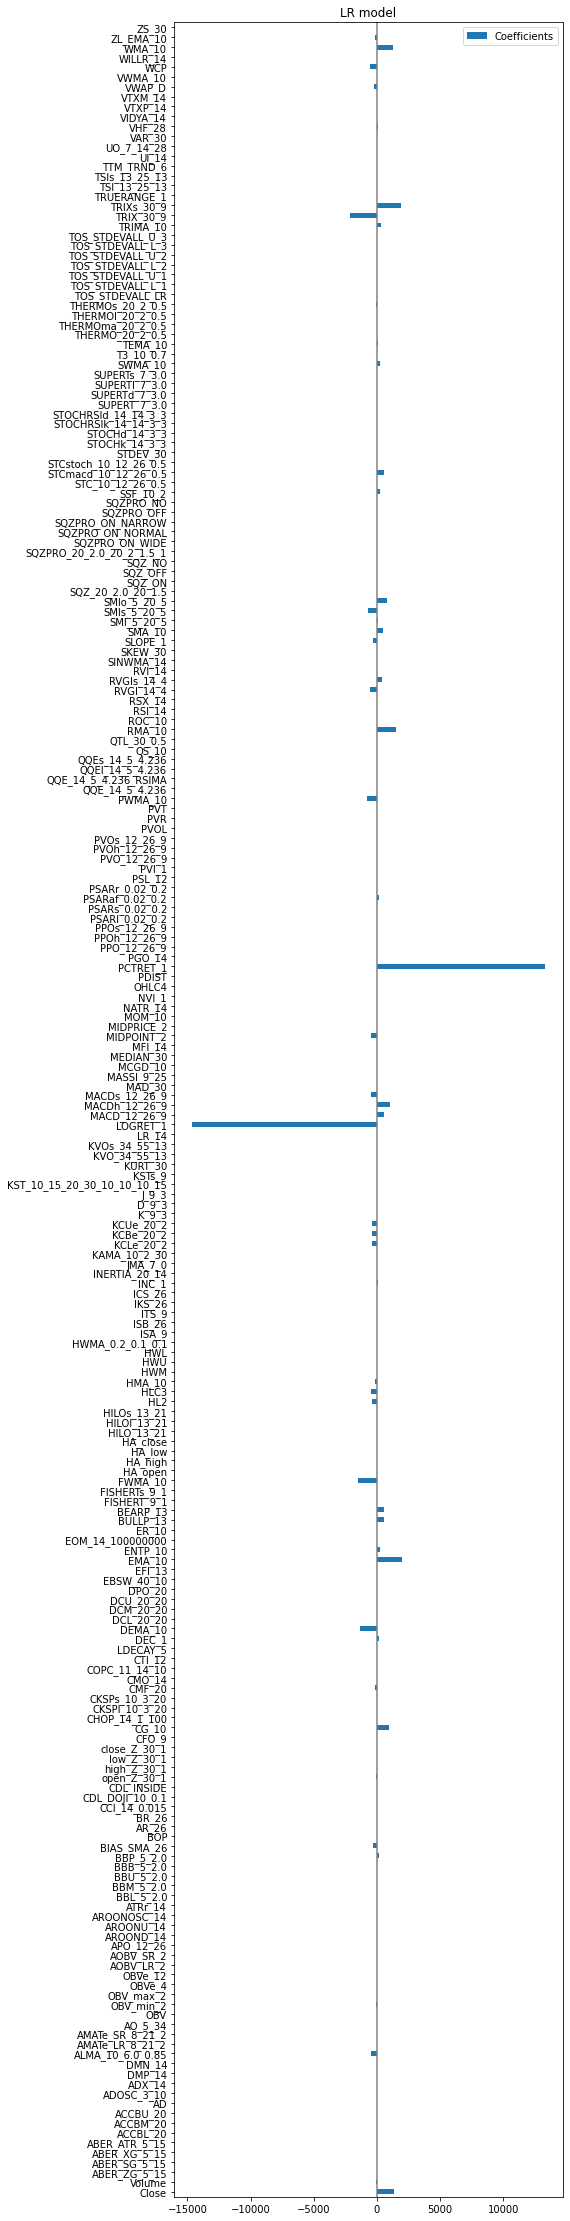

In [255]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### 상관계수가 높은 지표들

TRIX : 주식 종가에 대해 3번 지수이동평균한 값을 사용 하여 매매시점을 포착하는 지표이다

DEMA : Double Exponential Moving Average, EMA의 EMA

FWMA : Fibonacci's Weighted Moving Average

MACD : Moving Average Convergence Divergence

LOGRET : log(close.diff(periods=length)

PCTRET : 종가 차이의 퍼센트인듯?

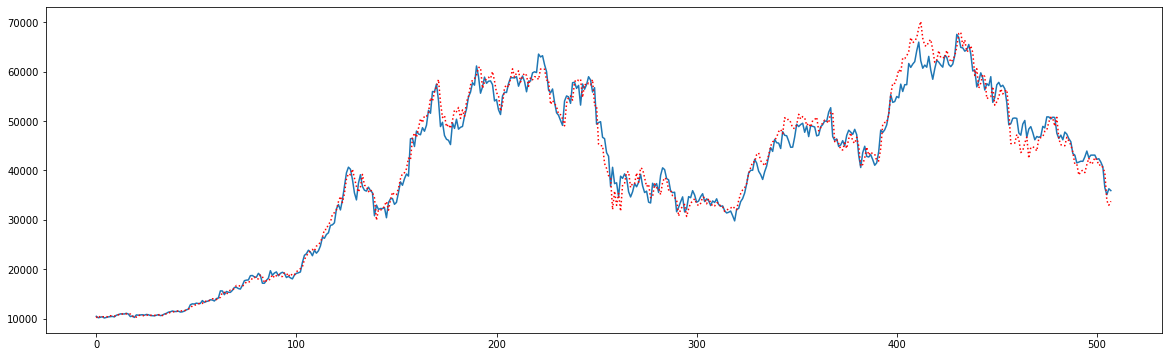

In [258]:
y_valid = y_valid.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(y_valid)
plt.plot(y_pred, color='red', linestyle=":")

In [259]:
mean_squared_error(y_valid, y_pred)

4713614.470789966

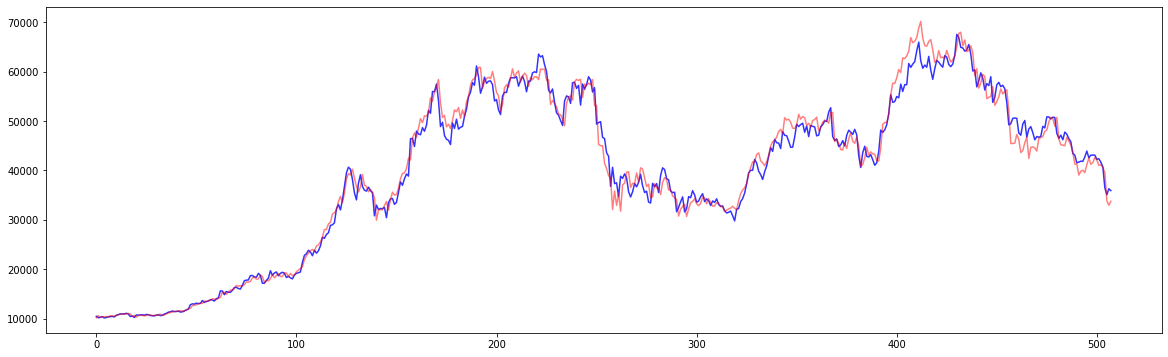

In [260]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_valid), alpha=0.8, color='b')
plt.plot(pd.Series(LR.predict(x_valid)), alpha=0.5, color='r')
plt.show()


In [493]:
predict_df5
predict_df6 = predict_df5.drop(['PCTRET_1','LOGRET_1'], axis=1)
col_dict = predict_df6.columns

data = predict_df6[col_dict[:-1]]
target = predict_df5['y_true']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

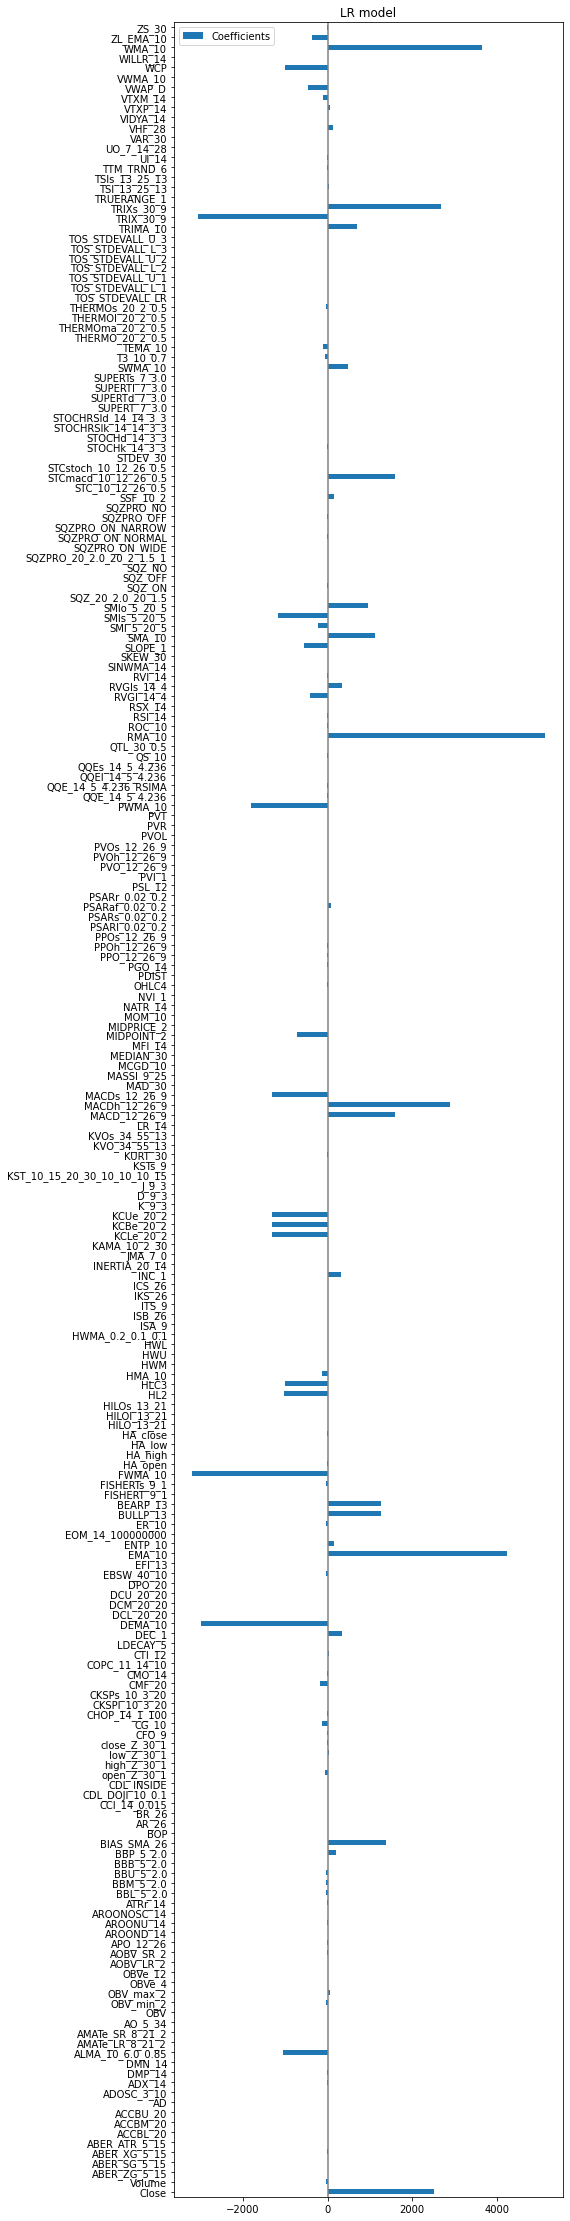

In [494]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

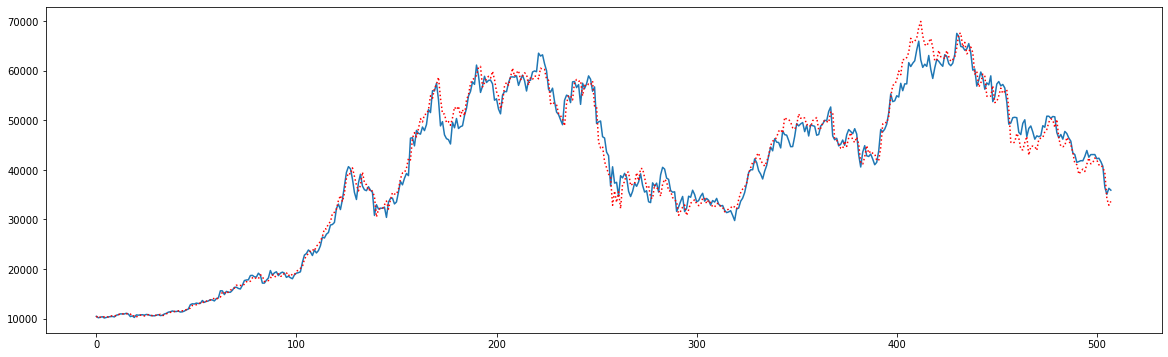

In [495]:
y_valid = y_valid.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(y_valid)
plt.plot(y_pred, color='red', linestyle=":")

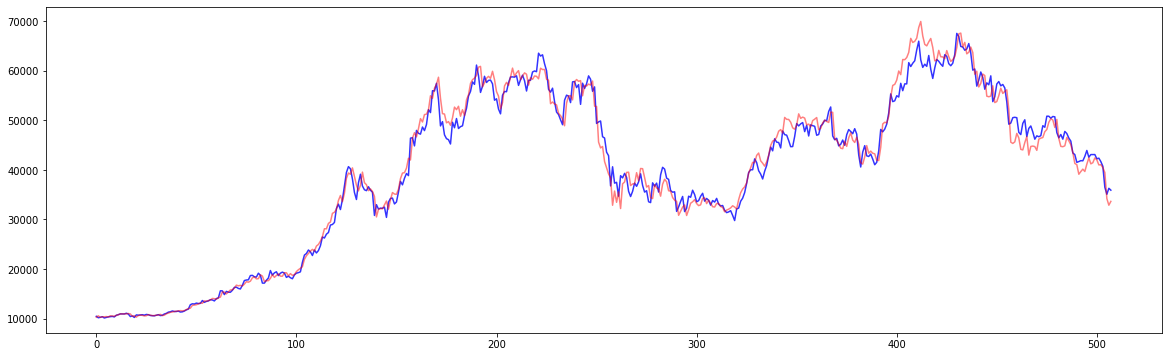

In [496]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_valid), alpha=0.8, color='b')
plt.plot(pd.Series(LR.predict(x_valid)), alpha=0.5, color='r')
plt.show()

In [497]:
diff = np.mean(np.abs(LR.predict(x_valid)-y_valid)/y_valid)
diff

0.03665298040253897

# 여기까지 70% 학습, 30%로 예측하는 것

---
# 심민성님 코드 적용 (디버깅 중)

In [1]:
from tqdm import tqdm
import numpy as np
import datetime

In [2]:
def batch(iterable, batch_size, pt):
    """
    batch row 생성 이터레이터
    Args:
        iterable: iterable datastructure
        batch_size:
        pt: prediction term 예측 기간
    Returns:
        yield: batch row
    """

    l = len(iterable)
    for idx, ndx in tqdm(enumerate(range(0, l, pt))):
        yield idx, iterable[ndx: min(ndx + batch_size, l)]


def backtest_XGB_1d(test_df: pd.DataFrame, ft: int, pt: int, plot=True) -> pd.DataFrame:
    """

    Args:
        test_df: 1시간 봉 데이터
        ft: fitting term 피팅 시킬 기간
        pt: prediction term 예측 기간
        arima_params:
    Returns:
        df: 예측 값이 열로 포함된 DataFrame
    """
    df = test_df.copy()
    batch_size = ft + pt
    total_loop = int(len(df) / pt) - 1
    result_columns = list(df.columns)
    result_columns.append("prediction_close")

    result_df = pd.DataFrame(columns=result_columns)

    try:
        for idx, batch_df in batch(df, batch_size, pt):
            # print(f'{idx}/{total_loop} running loop...')
            train, test = batch_df[:ft-1], batch_df[ft-1:ft]
            X_train, y_train = train.drop('target',axis=1,inplace=False),train['target']
            X_test, y_test = test.drop('target',axis=1,inplace=False),test['target']
            LR = LinearRegression()
            LR.fit(X_train, y_train)
            pred = LR.predict(X_test)
            if len(pred) ==0:
                break
            row = batch_df.iloc[[-1]]
            row['prediction_close'] = pred
            row['batch_open'] = batch_df.iloc[ft].o
            result_df = pd.concat([result_df, row], axis=0)

    except IndexError:
        pass
    result_df['trade'] = np.where(result_df['batch_open'] < result_df['prediction_close'], 1, 0)
    result_df['ror'] = np.where(result_df['trade'] == 1, result_df['c'] / result_df['batch_open'], 1)
    result_df['cr'] = result_df['ror'].cumprod()
    result_df['mdd'] = (result_df['cr'].cummax() - result_df['cr']) / result_df['cr'].cummax() * 100

    if plot:
        plot_result(result_df)
        plot_return(result_df)

    return result_df

def plot_result(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(l[i][:10],'%Y-%m-%d')
    plt.plot(l, df['c'].values, color='b', label='real close')
    plt.plot(l, df['prediction_close'].values , color='r', label='prediction close')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_return(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(l[i][:10],'%Y-%m-%d')
    plt.plot(l, df['cr'].values , color='r', label='return')
    plt.legend()
    plt.title(
        f"mdd: {round(df['mdd'].max(), 2)}\nreturn_rate: {round(df['cr'].iloc[-1] * 100 - 100, 2)}%")
    plt.grid(True)
    plt.show()


def analysis_return(test_df):
    # ror: 일일 수익률
    # trading_rate: 거래 확률
    # success_rate: 거래 성공 확률
    # pnl_rate: 손익비
    # mdd: 최대 손실 낙폭
    # cr: 누적 수익률

    df = test_df.copy()
    df['success'] = np.where((df['ror'] > 1) & (df['trade'] == 1), 1, 0)
    df['fail'] = np.where((df['ror'] < 1) & (df['trade'] == 1), 1, 0)
    df['success_ror'] = np.where(df['success'], (df['ror'] - 1) * 100, 0)
    df['fail_ror'] = np.where(df['fail'], (1 - df['ror']) * 100, 0)

    trade_rate = df['trade'].sum() / len(df)
    success_rate = df['success'].sum() / df['trade'].sum()
    pnl_rate = df['success_ror'].sum() / df['fail_ror'].sum()
    mdd = df['mdd'].max()
    cr = df['cr'].iloc[-1]

    return_dict = {}
    return_dict['trade_rate'] = f'{trade_rate * 100: .2f}%'
    return_dict['success_rate'] = f'{success_rate * 100: .2f}%'
    return_dict['pnl_rate'] = f'{pnl_rate: .2f}'
    return_dict['mdd'] = f'{mdd: .2f}%'
    return_dict['cr'] = f'{(cr - 1) * 100: .2f}%'

    return return_dict

NameError: name 'pd' is not defined

In [84]:
x_valid['day'] = x_valid.index
x_valid
x_valid['Timestamp'] = pd.to_datetime(x_valid['day'], format='%D') 

In [108]:
%debug (backtest_LR_1D(x_valid, 200, 1))

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
None
> <string>(1)<module>()



0it [00:00, ?it/s]


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Input In [97], in backtest_LR_1D(test_df, ft, pt, plot)
     40 train, test = batch_df[:ft][['Close']], batch_df[ft:][['Close']]
     41 model = LinearRegression()
---> 42 model_fit = model.fit(train, test)
     43 full_LR = model_fit.predict(test)
     44 row = batch_df.iloc[[-1]]

File c:\Users\chldl\Desktop\공부\데이터캡스톤디자인\Code\bitcoin\lib\site-packages\sklearn\linear_model\_base.py:662, in LinearRegression.fit(self, X, y, sample_weight)
    658 n_jobs_ = self.n_jobs
    660 accept_sparse = False if self.positive else ["csr", "csc", "coo"]
--> 662 X, y = self._validate_data(
    663     X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
    664 )
    666 if sample_weight is not None:
    667     sample_weight = _check_sample_weight(sample_weight, X, dtype=X.dtype)

File c:\Users\chldl\Desktop\공부\데이터캡스톤디자인\Code\bitcoin\

In [87]:
type(x_valid)

pandas.core.frame.DataFrame

In [109]:
result_df = backtest_LR_1D(x_valid, 1, 1)

0it [00:00, ?it/s]


AttributeError: 'Series' object has no attribute 'Open'

---

# 기준을 나누어서 학습 후 예측

In [343]:
# 알파 : Train을 나누고 싶은 기준
alpha_list = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50]
pred_list = []
loss_list = []
coefs_list = []

for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    r = len(data) - (alpha + 1)
    pred = []
    loss = []
    
    for j in range(0, r):
        alpha_data = data[j:alpha] # j부터 alpha까지 스플릿
        alpha_target = target[j:alpha] # j부터 alpha까지 스플릿

        model = LinearRegression()
        LR = model.fit(alpha_data[:-1], alpha_target[:-1]) # 스플릿한 데이터로 학습 진행, 마지막 데이터는 숨기기
        
        temporay_pred = round(LR.predict(alpha_data.tail(1))[0], 2) # 학습된 모델로 다음 날 종가 예측
        temporay_true = round(alpha_target[-1], 2) # 실제 값
        temporay_loss = round(temporay_true - temporay_pred, 2) # 실제 - 예측
        
        pred.append(temporay_pred)
        loss.append(abs(temporay_loss))
        
        if j % 1000 == 0:
            print(j, "~", alpha, "학습 중")
            print("예측 값 : ", temporay_pred, ", 실제 값 : ", temporay_true)
            print("실제 - 예측 값 : ", temporay_loss)
        alpha += 1
    
    print(alpha_list[i], "으로 나누어 LR 학습 및 예측 종료")
    coefs = pd.DataFrame(model.coef_, columns=['Coefficients'], index=x_train.columns)
    coefs_list.append(coefs)
    pred_list.append(pred)
    loss_list.append(loss)

0 ~ 3 학습 중
예측 값 :  233.99 , 실제 값 :  244.96
실제 - 예측 값 :  10.97
1000 ~ 1003 학습 중
예측 값 :  6466.01 , 실제 값 :  6525.17
실제 - 예측 값 :  59.16
2000 ~ 2003 학습 중
예측 값 :  11725.81 , 실제 값 :  11683.03
실제 - 예측 값 :  -42.78
3 으로 나누어 LR 학습 및 예측 종료
0 ~ 4 학습 중
예측 값 :  241.59 , 실제 값 :  235.79
실제 - 예측 값 :  -5.8
1000 ~ 1004 학습 중
예측 값 :  6294.3 , 실제 값 :  6609.0
실제 - 예측 값 :  314.7
2000 ~ 2004 학습 중
예측 값 :  11941.53 , 실제 값 :  11895.12
실제 - 예측 값 :  -46.41
4 으로 나누어 LR 학습 및 예측 종료
0 ~ 5 학습 중
예측 값 :  246.19 , 실제 값 :  242.67
실제 - 예측 값 :  -3.52
1000 ~ 1005 학습 중
예측 값 :  6013.77 , 실제 값 :  7294.0
실제 - 예측 값 :  1280.23
2000 ~ 2005 학습 중
예측 값 :  12289.98 , 실제 값 :  11392.64
실제 - 예측 값 :  -897.34
5 으로 나누어 LR 학습 및 예측 종료
0 ~ 6 학습 중
예측 값 :  244.39 , 실제 값 :  246.1
실제 - 예측 값 :  1.71
1000 ~ 1006 학습 중
예측 값 :  7972.09 , 실제 값 :  7846.96
실제 - 예측 값 :  -125.13
2000 ~ 2006 학습 중
예측 값 :  12912.69 , 실제 값 :  11565.35
실제 - 예측 값 :  -1347.34
6 으로 나누어 LR 학습 및 예측 종료
0 ~ 7 학습 중
예측 값 :  243.84 , 실제 값 :  245.87
실제 - 예측 값 :  2.03
1000 ~ 1007 학습 중
예측 값 :  8

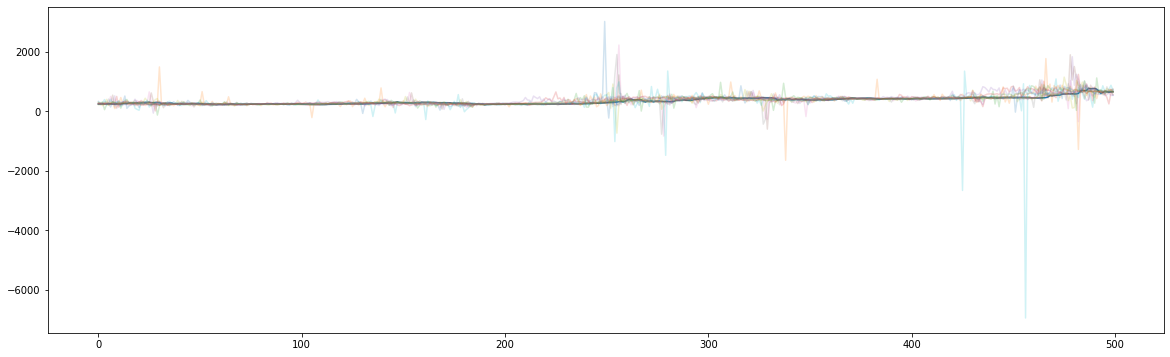

In [375]:
target2 = target.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(target2[:500], alpha=1)
for i in range(0, len(pred_list)):
    plt.plot(pred_list[i][:500], alpha=0.2)

음수로도 예측함 ㅋㅋ

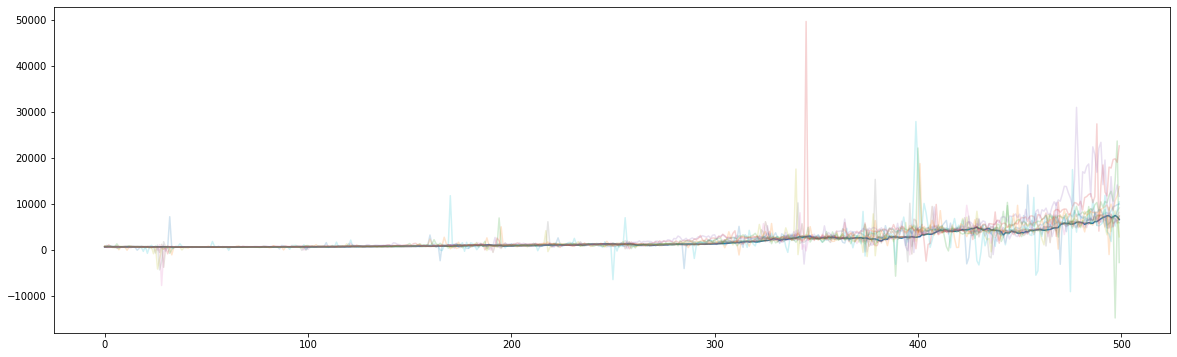

In [381]:
target2 = target.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(list(target2)[500:1000], alpha=1)
for i in range(0, len(pred_list)):
    plt.plot(pred_list[i][500:1000], alpha=0.2)

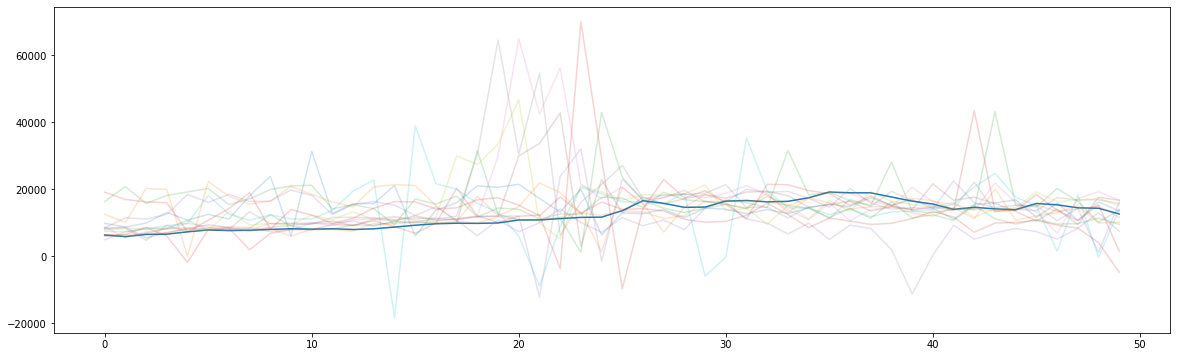

In [386]:
target2 = target.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(list(target2)[1000:1050], alpha=1)
for i in range(0, len(pred_list)):
    plt.plot(pred_list[i][1000:1050], alpha=0.2)

응 망했어~

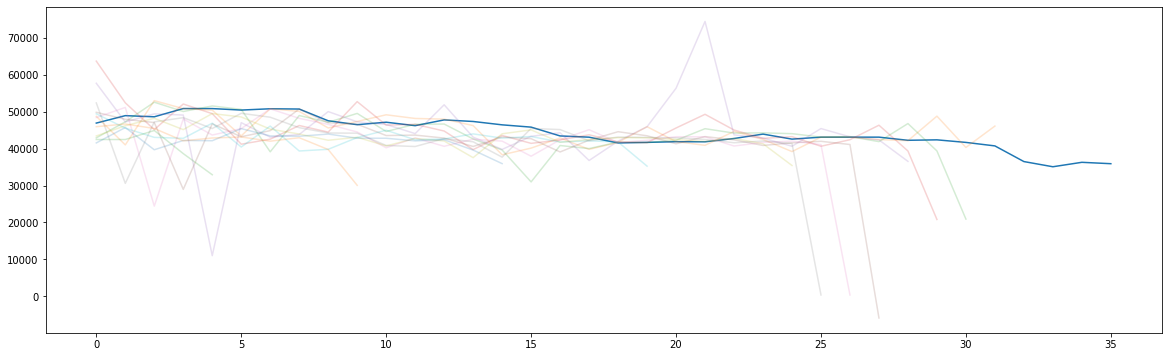

In [390]:
target2 = target.reset_index(drop=True)
plt.figure(figsize=(20, 6))
plt.plot(list(target2)[2500:], alpha=1)
for i in range(0, len(pred_list)):
    plt.plot(pred_list[i][2500:], alpha=0.2)

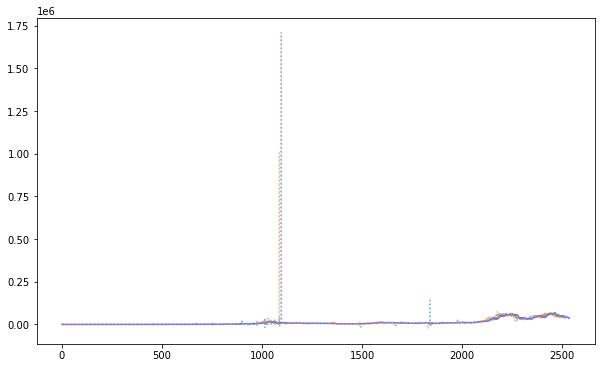

In [401]:
plt.figure(figsize=(10, 6))
plt.plot(list(target2), alpha=0.5, color='blue')
plt.plot(list(pred_list[8]), alpha=0.5, linestyle=":")
plt.plot(list(pred_list[10]), alpha=0.5, linestyle=":")

---
# 이상치 탐지

In [508]:
pred_frame = pd.DataFrame(pred_list)

In [510]:
pred_frame = pred_frame.transpose()
pred_list = pred_frame.values.tolist()
columns_name = ['3 days', '4 days', '5 days', '6 day', '7 day', '8 day', '9 day', '10 day', '15 day', '20 day'
                , '25 day', '30 day', '40 day', '50 day']
pred_frame = pd.DataFrame(pred_list, columns=columns_name)

In [529]:
pred_frame.describe()

,3 days,4 days,5 days,6 day,7 day,8 day,9 day,10 day,15 day,20 day,25 day,30 day,40 day,50 day
count,2532.000000,2.531000e+03,2.530000e+03,2529.000000,2528.000000,2527.000000,2526.000000,2525.000000,2.520000e+03,2.515000e+03,2.510000e+03,2.505000e+03,2495.000000,2485.000000
mean,11608.972784,1.219065e+04,1.106525e+04,11283.272574,11524.767429,11514.216150,11639.617751,11685.623362,1.240860e+04,1.224866e+04,1.210934e+04,1.221520e+04,12116.716585,12199.411932
std,21108.467562,3.081390e+04,3.005912e+04,30679.429689,16628.814264,17011.621117,16555.040466,16770.150009,3.772588e+04,3.071242e+04,2.568175e+04,2.984494e+04,23054.355148,23639.024495
min,-522839.750000,-8.458649e+04,-1.045631e+06,-970702.920000,-19514.900000,-204356.590000,-64219.400000,-83982.990000,-1.842528e+04,-8.514750e+03,-2.634431e+04,-4.280653e+04,-58113.990000,-74784.910000
25%,709.277500,6.680550e+02,6.802025e+02,677.340000,710.300000,713.210000,713.967500,704.320000,7.146325e+02,7.407650e+02,7.451150e+02,7.583700e+02,773.535000,772.870000
50%,6412.850000,6.259700e+03,6.293645e+03,6120.080000,6353.360000,6361.050000,6428.330000,6398.250000,6.407010e+03,6.496860e+03,6.492820e+03,6.550570e+03,6587.970000,6579.570000
75%,10594.360000,1.102501e+04,1.114360e+04,10655.120000,10888.747500,10850.350000,10919.135000,10872.020000,1.091171e+04,1.083810e+04,1.082827e+04,1.075343e+04,10660.170000,10881.610000
max,382154.340000,1.194316e+06,4.727598e+05,521619.950000,131191.450000,104409.230000,74949.080000,152288.540000,1.710390e+06,1.315591e+06,1.005337e+06,1.262024e+06,814078.130000,847333.170000


In [531]:
pred_frame2 = pred_frame.copy()
for i in range(len(columns_name)):
    q1 = pred_frame2[columns_name[i]].quantile(0.25)
    q2 = pred_frame2[columns_name[i]].quantile(0.5)
    q3 = pred_frame2[columns_name[i]].quantile(0.75)
    iqr = q3-q1
    
    condition1 = pred_frame2[columns_name[i]] < 0
    condition2 = pred_frame2[columns_name[i]] > q3 + 1.5 * iqr
    pred_frame2.drop(pred_frame2[condition1].index, inplace=True)
    pred_frame2.drop(pred_frame2[condition2].index, inplace=True)

In [532]:
pred_frame2

,3 days,4 days,5 days,6 day,7 day,8 day,9 day,10 day,15 day,20 day,25 day,30 day,40 day,50 day
0,233.99,241.59,246.19,244.39,243.84,249.74,286.26,210.46,233.52,323.39,273.63,287.53,248.97,243.77
1,244.62,249.47,244.16,242.04,248.97,285.33,219.76,235.10,209.13,252.19,235.97,281.62,253.99,255.25
2,185.09,240.92,242.80,248.08,236.12,252.34,238.67,232.47,278.58,273.77,291.10,299.33,247.54,238.93
3,245.04,246.50,250.36,261.74,257.29,236.79,232.26,224.27,386.96,304.81,268.39,47.90,242.91,265.00
4,246.09,252.10,239.86,234.91,237.07,235.84,245.01,393.26,205.28,293.98,284.71,210.60,252.81,232.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,10739.74,10941.60,12226.95,11326.68,11938.50,11320.29,11788.08,11541.59,11820.41,12475.98,13740.17,15410.39,16055.98,18622.48
2064,11394.71,10043.07,11805.50,11858.27,11613.07,11382.39,11160.17,11607.83,12778.03,13354.67,14738.79,15464.76,17998.97,16814.06
2066,11466.57,11477.99,11294.59,11361.38,11655.89,11288.77,12193.84,12039.71,12598.43,13584.27,14880.04,16507.61,16121.77,18272.27
2074,15080.46,15284.91,12290.93,13344.26,14799.00,14762.63,14166.76,13503.13,14844.69,14502.13,17659.05,19091.61,17453.78,17245.09


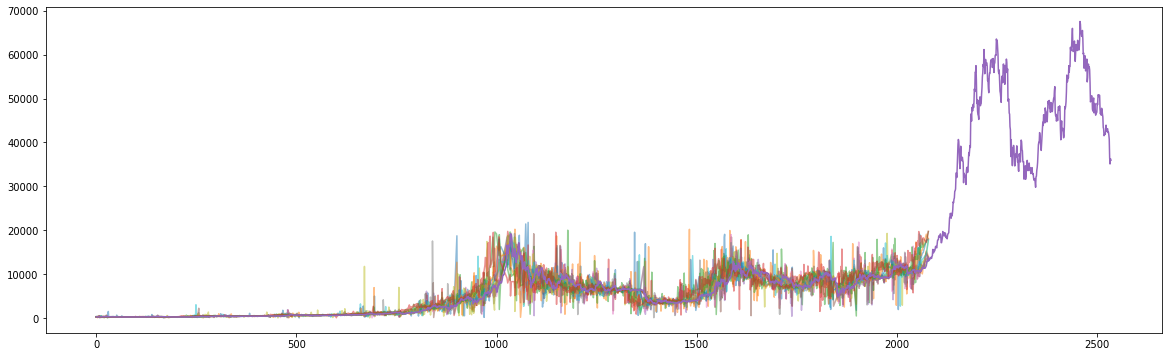

In [533]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame2, alpha=0.5)
plt.plot(target2, alpha=1)

이상치 제거하니까 봐줄만함 근데 불장을 이상치로 판단해서 지워버림 ㅋㅋ

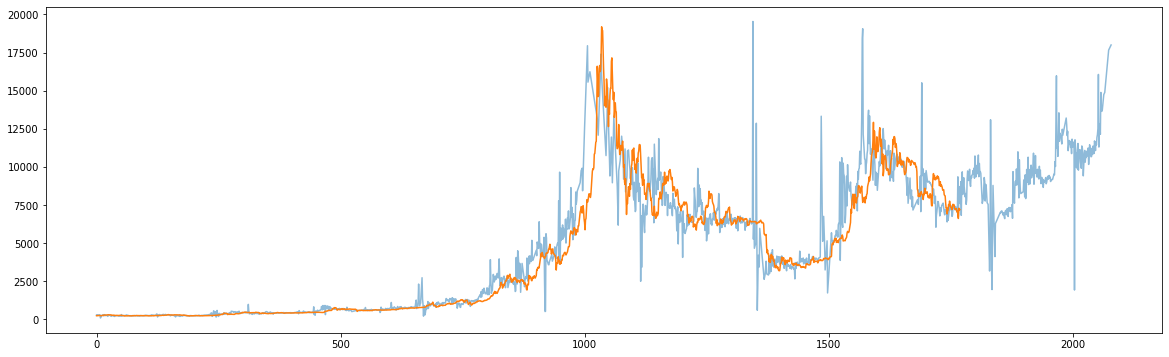

In [558]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame2['25 day'], alpha=0.5)
plt.plot(target2[:len(pred_frame2['25 day'])], alpha=1)

이게 당연한건가? 70% 학습한것보다 성능이 바닥임
오히려 장기간 학습한 데이터가 더 잘 예측하는 것 같음

그리고 50일 이상으로 왜 안했냐면

사실 100, 200, 500 단위로 학습하는거면

분할된 기준으로 봤을 때 데이터는 사실 1개 차이나는 건데
그 1개가 영향을 그렇게까진 주지 않을 것 같아서
일부러 작은 값으로 학습함

In [490]:
diff = np.mean(np.abs(pred_frame['25 day']-target2[:2079])/target2[:2079])

In [491]:
diff

0.17571444386137533

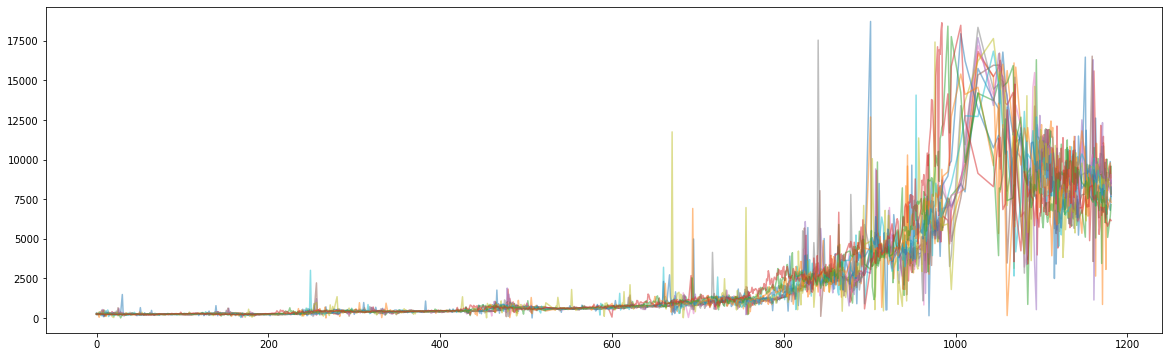

In [473]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame[0:1000], alpha=0.5)

In [536]:
pred_frame3 = pred_frame[2000:]
for i in range(len(columns_name)):
    q1 = pred_frame3[columns_name[i]].quantile(0.25)
    q2 = pred_frame3[columns_name[i]].quantile(0.5)
    q3 = pred_frame3[columns_name[i]].quantile(0.75)
    iqr = q3-q1
    
    condition1 = pred_frame3[columns_name[i]] < 0
    condition2 = pred_frame3[columns_name[i]] > q3 + 1.5 * iqr
    pred_frame3.drop(pred_frame3[condition1].index, inplace=True)
    pred_frame3.drop(pred_frame3[condition2].index, inplace=True)

In [539]:
pred_frame3

,3 days,4 days,5 days,6 day,7 day,8 day,9 day,10 day,15 day,20 day,25 day,30 day,40 day,50 day
2000,11725.81,11941.53,12289.98,12912.69,11737.42,11496.80,12359.58,11573.26,12076.08,11581.45,11285.63,11199.38,10666.86,10808.77
2001,11718.61,12314.41,13552.36,14232.68,11433.03,12280.95,11638.64,12076.56,11323.58,11525.08,11496.89,11315.86,10342.35,9916.77
2002,12245.33,11213.34,11953.58,11602.24,11880.20,11873.03,12214.22,11677.38,11378.24,11338.57,11618.00,10711.31,10790.35,11322.75
2003,10919.20,13190.18,11638.01,12027.75,11967.52,12222.08,11622.55,12330.69,11527.16,10767.88,11580.23,10448.54,11060.63,10450.76
2004,11506.98,11660.47,11461.91,12192.88,12156.24,11564.77,12297.71,11527.97,11677.11,11661.29,1916.96,9797.64,10568.94,10558.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,43104.55,43250.75,42412.70,43185.82,41112.51,370.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2528,42150.17,46784.85,39357.45,36547.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2529,48795.33,39373.61,20816.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2530,40311.92,20923.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


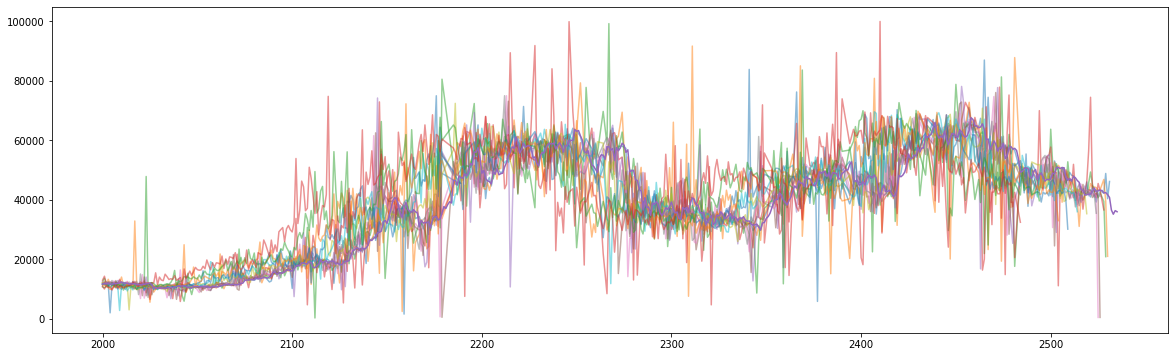

In [538]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame3, alpha=0.5)
plt.plot(target2[2000:], alpha=1)

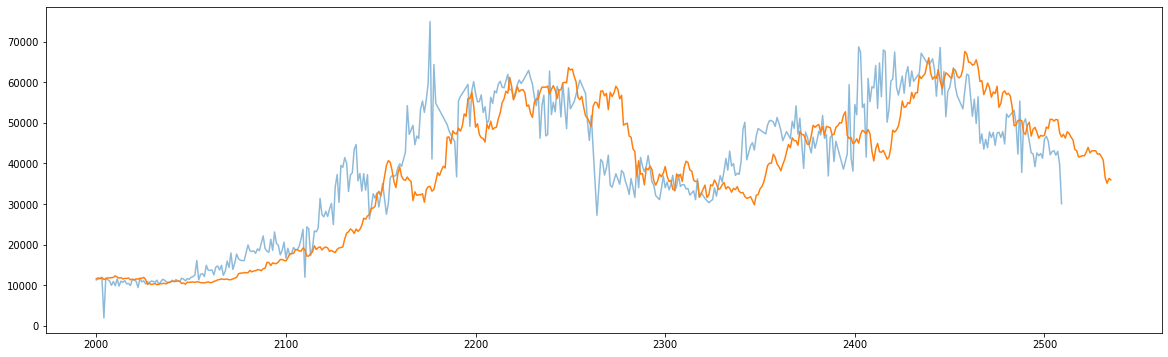

In [542]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame3['25 day'], alpha=0.5)
plt.plot(target2[2000:], alpha=1)

In [545]:
diff2 = np.mean(np.abs(pred_frame3['25 day']-target2[2000:])/target2[2000:])
diff2

0.19412811000520913

불장은 더 안맞음

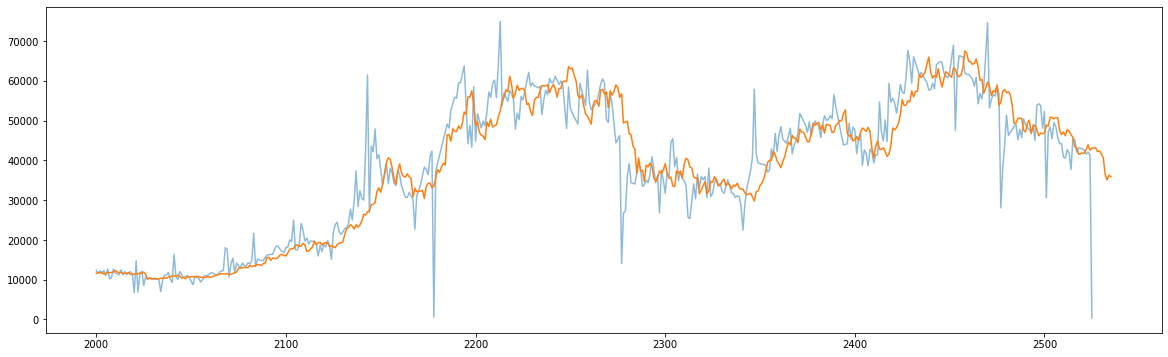

In [549]:
plt.figure(figsize=(20, 6))
plt.plot(pred_frame3['9 day'], alpha=0.5)
plt.plot(target2[2000:], alpha=1)

In [550]:
diff2 = np.mean(np.abs(pred_frame3['9 day']-target2[2000:])/target2[2000:])
diff2

0.11589909831482334

9일 기준으로 하면 조금 나아짐, 변동성이 클 수록 작은 단위로 학습?

# 아 다하고 나서 생각났는데 이상치 제거 할 때 drop하면 안됨... 하
# 시계열이 밀려서 의미가 없어지는 거 같은데...?

---

# 로스의 합

In [474]:
sum_loss = []
for i in range(len(loss_list)):
    sum_loss.append(sum(loss_list[i]))

for i in range(len(sum_loss)):
    print(alpha_list[i], "의 로스 합은", round(sum_loss[i]))

3 의 로스 합은 3387245
4 의 로스 합은 6844898
5 의 로스 합은 6747144
6 의 로스 합은 8322958
7 의 로스 합은 3854685
8 의 로스 합은 3274734
9 의 로스 합은 3092780
10 의 로스 합은 2964219
15 의 로스 합은 4725340
20 의 로스 합은 3699959
25 의 로스 합은 3330485
30 의 로스 합은 3645983
40 의 로스 합은 3477512
50 의 로스 합은 3989869


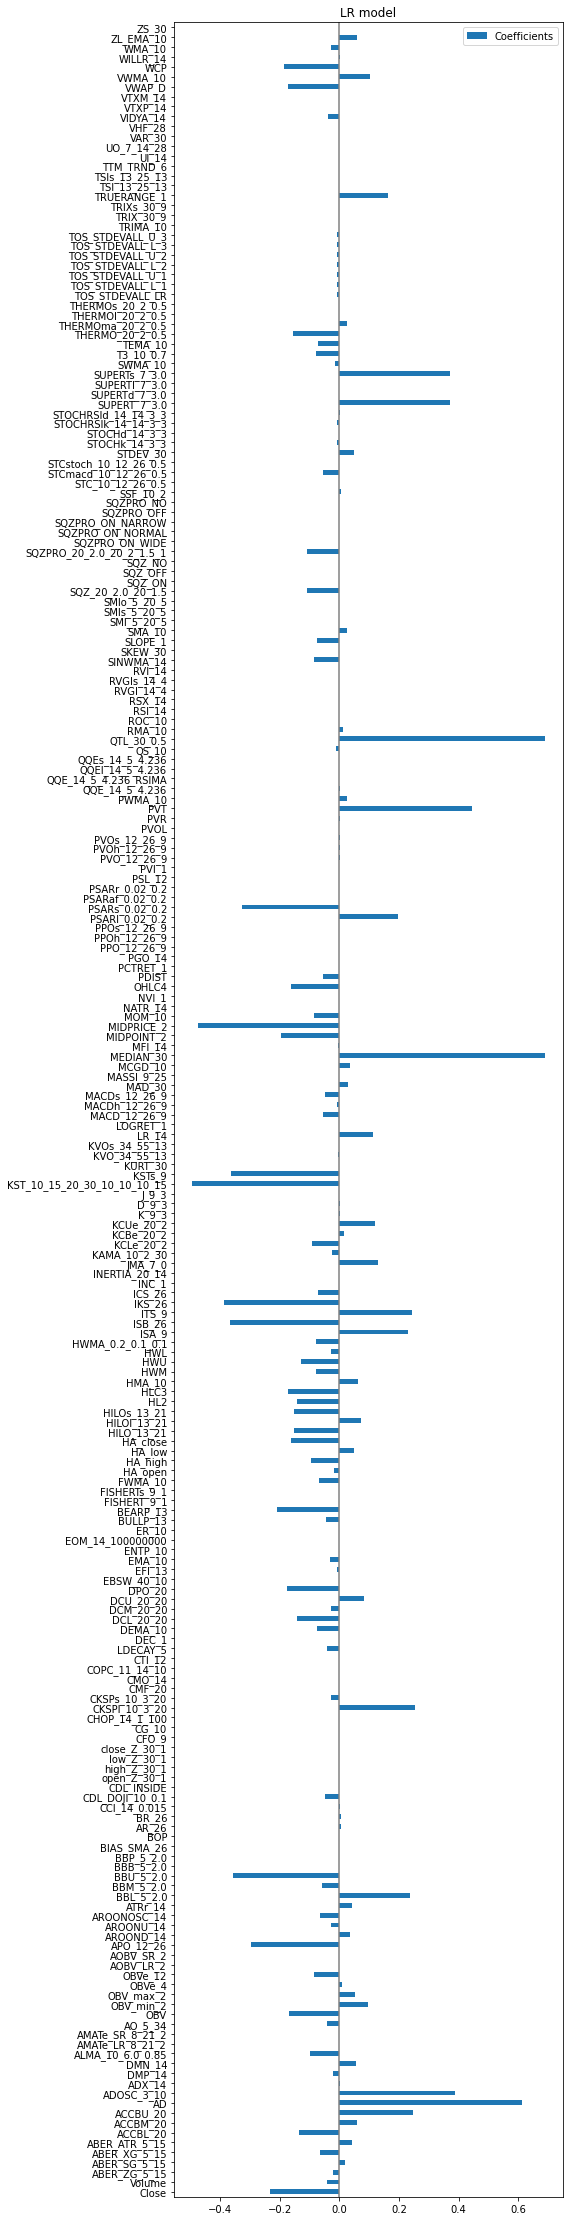

In [475]:
coefs_list[10].plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### 예측에 대한 총 로스가 2,964,219 달러...? 296만 달러 = 3,658,187,131 원
### 해당 모델대로 투자하면 36억원 어치를 잃음
#### 현재 종가보다 예측값이 크면 매수, 예측이 현재 종가보다 낮으면 매도하는 방식으로 수익률 계산?